<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,92.990405,88.482096,-0.019341,191.453160,191.473556,-0.020396
1,0.0,1.0,68.825257,34.117910,-0.023722,112.919445,112.937122,-0.017676
2,0.0,2.0,62.052526,29.862285,-0.019265,101.895546,101.908300,-0.012754
3,0.0,3.0,67.098196,47.340016,-0.114191,124.324021,124.434035,-0.110014
4,0.0,4.0,90.922434,98.584711,0.038150,199.545295,199.509642,0.035654
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.073171,24.413035,0.035683,128.521888,128.486137,0.035751
249996,999.0,246.0,44.655840,85.226805,0.011804,139.894449,139.877451,0.016998
249997,999.0,247.0,56.612762,53.594797,0.015923,120.223482,120.205316,0.018166
249998,999.0,248.0,77.613893,81.317285,0.018501,168.949679,168.925695,0.023984


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    92.990405  88.482096 -0.019341  191.453160  191.473556 -0.020396
      1.0    68.825257  34.117910 -0.023722  112.919445  112.937122 -0.017676
      2.0    62.052526  29.862285 -0.019265  101.895546  101.908300 -0.012754
      3.0    67.098196  47.340016 -0.114191  124.324021  124.434035 -0.110014
      4.0    90.922434  98.584711  0.038150  199.545295  199.509642  0.035654
...                ...        ...       ...         ...         ...       ...
999.0 245.0  94.073171  24.413035  0.035683  128.521888  128.486137  0.035751
      246.0  44.655840  85.226805  0.011804  139.894449  139.877451  0.016998
      247.0  56.612762  53.594797  0.015923  120.223482  120.205316  0.018166
      248.0  77.613893  81.317285  0.018501  168.949679  168.925695  0.023984
      249.0  41.916385  52.435797  0.034872  104.387053  104.350361  0.036692

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    92.990405  88.482096 -0.019341  191.453160  191.473556 -0.020396
      1.0    68.825257  34.117910 -0.023722  112.919445  112.937122 -0.017676
      2.0    62.052526  29.862285 -0.019265  101.895546  101.908300 -0.012754
      3.0    67.098196  47.340016 -0.114191  124.324021  124.434035 -0.110014
      4.0    90.922434  98.584711  0.038150  199.545295  199.509642  0.035654
...                ...        ...       ...         ...         ...       ...
999.0 245.0  94.073171  24.413035  0.035683  128.521888  128.486137  0.035751
      246.0  44.655840  85.226805  0.011804  139.894449  139.877451  0.016998
      247.0  56.612762  53.594797  0.015923  120.223482  120.205316  0.018166
      248.0  77.613893  81.317285  0.018501  168.949679  168.925695  0.023984
      249.0  41.916385  52.435797  0.034872  104.387053  104.350361  0.036692

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,92.990405,88.482096,-0.019341,191.453160,191.473556,-0.020396
1,0.0,1.0,68.825257,34.117910,-0.023722,112.919445,112.937122,-0.017676
2,0.0,2.0,62.052526,29.862285,-0.019265,101.895546,101.908300,-0.012754
3,0.0,3.0,67.098196,47.340016,-0.114191,124.324021,124.434035,-0.110014
4,0.0,4.0,90.922434,98.584711,0.038150,199.545295,199.509642,0.035654
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.073171,24.413035,0.035683,128.521888,128.486137,0.035751
249996,999.0,246.0,44.655840,85.226805,0.011804,139.894449,139.877451,0.016998
249997,999.0,247.0,56.612762,53.594797,0.015923,120.223482,120.205316,0.018166
249998,999.0,248.0,77.613893,81.317285,0.018501,168.949679,168.925695,0.023984


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    92.990405  88.482096 -0.019341  191.453160  191.473556 -0.020396
      1.0    68.825257  34.117910 -0.023722  112.919445  112.937122 -0.017676
      2.0    62.052526  29.862285 -0.019265  101.895546  101.908300 -0.012754
      3.0    67.098196  47.340016 -0.114191  124.324021  124.434035 -0.110014
      4.0    90.922434  98.584711  0.038150  199.545295  199.509642  0.035654
...                ...        ...       ...         ...         ...       ...
999.0 245.0  94.073171  24.413035  0.035683  128.521888  128.486137  0.035751
      246.0  44.655840  85.226805  0.011804  139.894449  139.877451  0.016998
      247.0  56.612762  53.594797  0.015923  120.223482  120.205316  0.018166
      248.0  77.613893  81.317285  0.018501  168.949679  168.925695  0.023984
      249.0  41.916385  52.435797  0.034872  104.387053  104.350361  0.036692

[250000 rows x 6 columns]

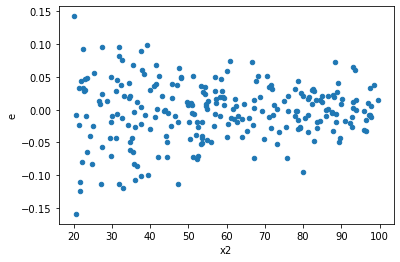

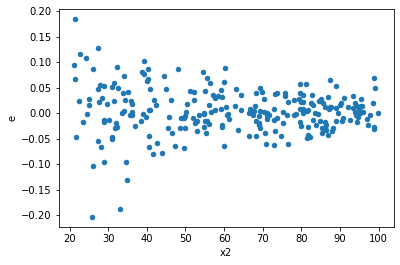

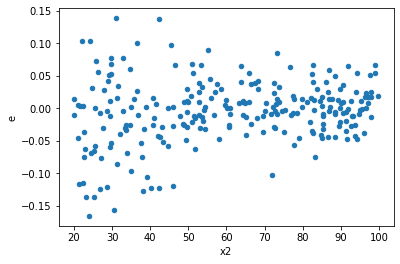

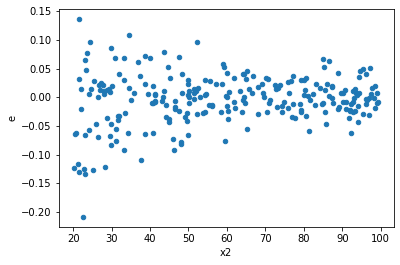

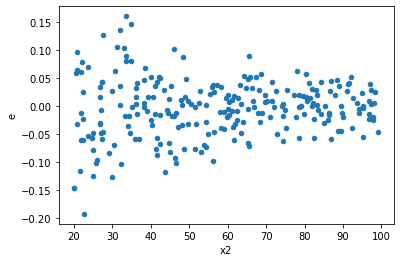

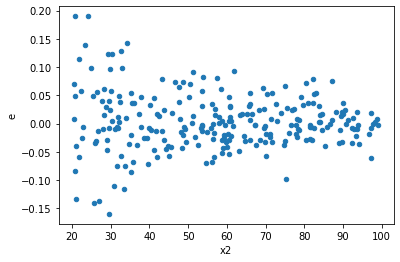

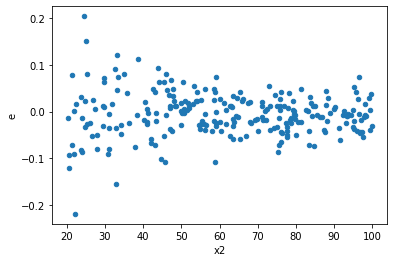

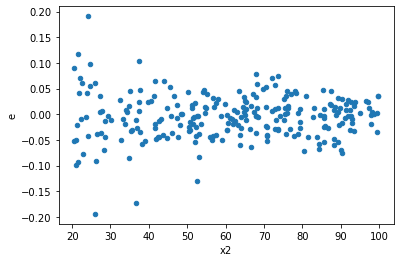

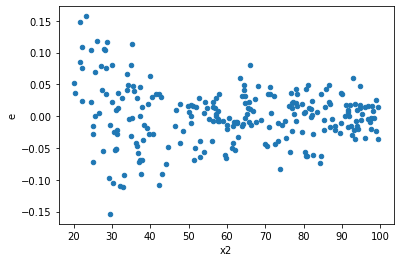

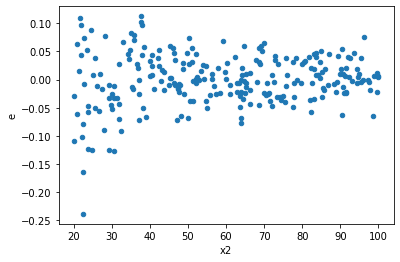

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,128.0,118.0,0.19618939709534672,0.3072880472451799,0.0015327296648073962,0.0026041359936032193,1.6990184592861368,0.003715614027991254,0.9981421929860044,0.001857807013995627,Reject001=0 : Heteroscedasticity
4.0,118.0,128.0,0.17507470907278744,0.47478608806030886,0.001483683975193114,0.003709266312971163,2.5000379966282043,5.320061702285273e-07,0.9999997339969149,2.6600308511426363e-07,Reject001=0 : Heteroscedasticity
7.0,112.0,134.0,0.13617767867310326,0.32339536101334726,0.0012158721310098505,0.0024133982165175168,1.9849112048592257,0.00015307169120482023,0.9999234641543976,7.653584560241011e-05,Reject001=0 : Heteroscedasticity
9.0,129.0,117.0,0.1522526077516139,0.37993275712581487,0.0011802527732683247,0.003247288522442862,2.7513500463553724,5.431985239390258e-08,0.9999999728400738,2.715992619695129e-08,Reject001=0 : Heteroscedasticity
10.0,147.0,99.0,0.18079010843872892,0.4111911687748314,0.0012298646832566594,0.004153446149240721,3.377157020431281,6.214946335347804e-10,0.9999999996892527,3.107473167673902e-10,Reject001=0 : Heteroscedasticity
12.0,115.0,131.0,0.12512868882531522,0.45256313499657147,0.001088075555002741,0.0034546804198211565,3.1750372517214154,3.1168778669155017e-10,0.9999999998441561,1.5584389334577509e-10,Reject001=0 : Heteroscedasticity
13.0,122.0,124.0,0.1715362571713774,0.48479456649832736,0.0014060348948473557,0.003909633600792962,2.780609226072875,2.8448817523951675e-08,0.9999999857755912,1.4224408761975837e-08,Reject001=0 : Heteroscedasticity
14.0,104.0,142.0,0.11371541090474015,0.48858739577041926,0.0010934174125455784,0.003440756308242389,3.1467912151060276,3.0998514866098503e-10,0.9999999998450074,1.5499257433049252e-10,Reject001=0 : Heteroscedasticity
17.0,127.0,119.0,0.1516390424223845,0.42657022077172635,0.0011940082080502715,0.003584623703964087,3.0021767687992,3.5781781981825134e-09,0.9999999982109109,1.7890890990912567e-09,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,118.0,128.0,0.3320495819302785,0.16646074157236848,0.0028139795078837163,0.0013004745435341288,0.46214783721440983,2.7496423796600466e-05,Reject001=0 : Heteroscedasticity
1.0,128.0,118.0,0.19618939709534672,0.3072880472451799,0.0015327296648073962,0.0026041359936032193,1.6990184592861368,0.003715614027991254,Reject001=0 : Heteroscedasticity
2.0,104.0,142.0,0.34992380799293155,0.21021860747372362,0.003364651999932034,0.0014804127286881946,0.4399898499809487,1.4790211114884908e-05,Reject001=0 : Heteroscedasticity
3.0,112.0,134.0,0.29519375204709203,0.18195736436610305,0.0026356585004204645,0.0013578907788515152,0.5151998176679157,0.00033957435122086775,Reject001=0 : Heteroscedasticity
4.0,118.0,128.0,0.17507470907278744,0.47478608806030886,0.001483683975193114,0.003709266312971163,2.5000379966282043,5.320061702285273e-07,Reject001=0 : Heteroscedasticity
5.0,121.0,125.0,0.47711993702613226,0.13793356706944243,0.00394313997542258,0.0011034685365555394,0.27984513444448095,1.002243446309294e-11,Reject001=0 : Heteroscedasticity
6.0,135.0,111.0,0.39550207671352006,0.16012991830739706,0.002929645012692741,0.0014426118766432167,0.4924186617808895,9.151066067515079e-05,Reject001=0 : Heteroscedasticity
7.0,112.0,134.0,0.13617767867310326,0.32339536101334726,0.0012158721310098505,0.0024133982165175168,1.9849112048592257,0.00015307169120482023,Reject001=0 : Heteroscedasticity
8.0,129.0,117.0,0.36269869489341694,0.143551519757969,0.0028116177898714493,0.0012269360663074275,0.436380816314128,5.288398094222181e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    959
Reject001=1 : Homoscedasticity       41
Name: Result_test, dtype: int64